<a href="https://colab.research.google.com/github/DOMINION-JOHN1/Volatilty-index-price-prediction/blob/main/Volatility_index_price_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
import yfinance as yf

In [ ]:
stock_symbol = '^VIX'
start_date = '2020-01-01'
end_date = '2023-10-29'

# Fetch historical data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data=pd.DataFrame(data)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,13.460000,13.720000,12.420000,12.470000,12.470000,0
2020-01-03,15.010000,16.200001,13.130000,14.020000,14.020000,0
2020-01-06,15.450000,16.389999,13.540000,13.850000,13.850000,0
2020-01-07,13.840000,14.460000,13.390000,13.790000,13.790000,0
2020-01-08,15.160000,15.240000,12.830000,13.450000,13.450000,0
...,...,...,...,...,...,...
2023-10-23,21.830000,23.080000,19.480000,20.370001,20.370001,0
2023-10-24,20.030001,20.240000,18.650000,18.969999,18.969999,0
2023-10-25,19.389999,21.240000,18.860001,20.190001,20.190001,0


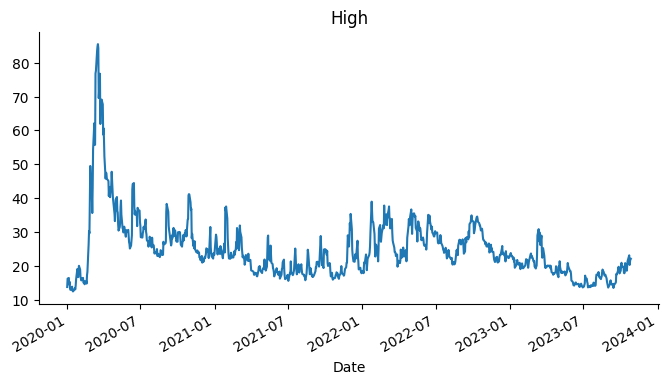

In [ ]:
from matplotlib import pyplot as plt
data['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

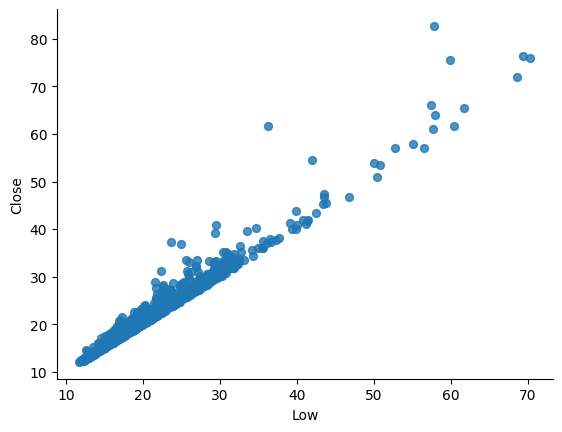

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Convert the "Date" column to a datetime object
data.index = pd.to_datetime(data.index)

# Create a new column for the month of the year (as numbers)
data['Month_Num'] = data.index.month

# Create a new column for the day of the week (as numbers, where Monday is 0 and Sunday is 6)
data['Day_of_Week_Num'] = data.index.dayofweek

# Display the DataFrame with the new columns
data


,Open,High,Low,Close,Adj Close,Volume,Month_Num,Day_of_Week_Num
Date,,,,,,,,
2020-01-02,13.460000,13.720000,12.420000,12.470000,12.470000,0,1,3
2020-01-03,15.010000,16.200001,13.130000,14.020000,14.020000,0,1,4
2020-01-06,15.450000,16.389999,13.540000,13.850000,13.850000,0,1,0
2020-01-07,13.840000,14.460000,13.390000,13.790000,13.790000,0,1,1
2020-01-08,15.160000,15.240000,12.830000,13.450000,13.450000,0,1,2
...,...,...,...,...,...,...,...,...
2023-10-23,21.830000,23.080000,19.480000,20.370001,20.370001,0,10,0
2023-10-24,20.030001,20.240000,18.650000,18.969999,18.969999,0,10,1
2023-10-25,19.389999,21.240000,18.860001,20.190001,20.190001,0,10,2


In [ ]:
df = data.reset_index(drop=True).drop(columns=['Adj Close'])
df

,Open,High,Low,Close,Volume,Month_Num,Day_of_Week_Num
0,13.460000,13.720000,12.420000,12.470000,0,1,3
1,15.010000,16.200001,13.130000,14.020000,0,1,4
2,15.450000,16.389999,13.540000,13.850000,0,1,0
3,13.840000,14.460000,13.390000,13.790000,0,1,1
4,15.160000,15.240000,12.830000,13.450000,0,1,2
...,...,...,...,...,...,...,...
958,21.830000,23.080000,19.480000,20.370001,0,10,0
959,20.030001,20.240000,18.650000,18.969999,0,10,1
960,19.389999,21.240000,18.860001,20.190001,0,10,2
961,21.780001,21.959999,20.219999,20.680000,0,10,3


In [ ]:
x = df.drop(['Close'], axis=1)
y = df['Close']


In [ ]:
scaler=RobustScaler()

In [ ]:
X=scaler.fit_transform(x)